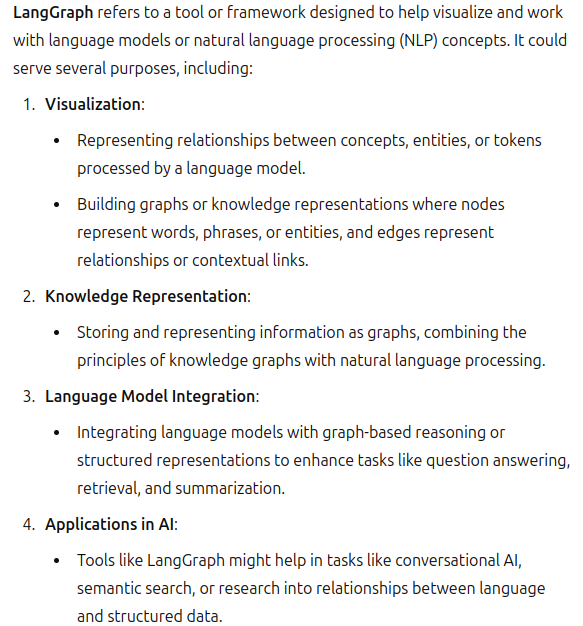

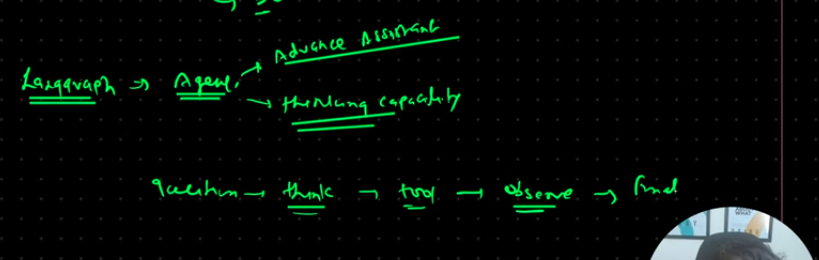

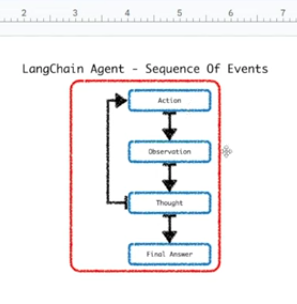  

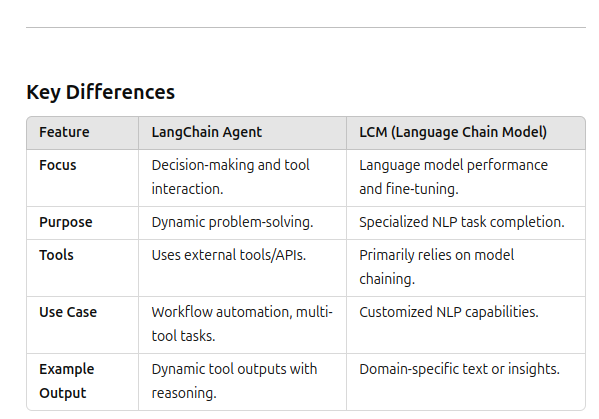

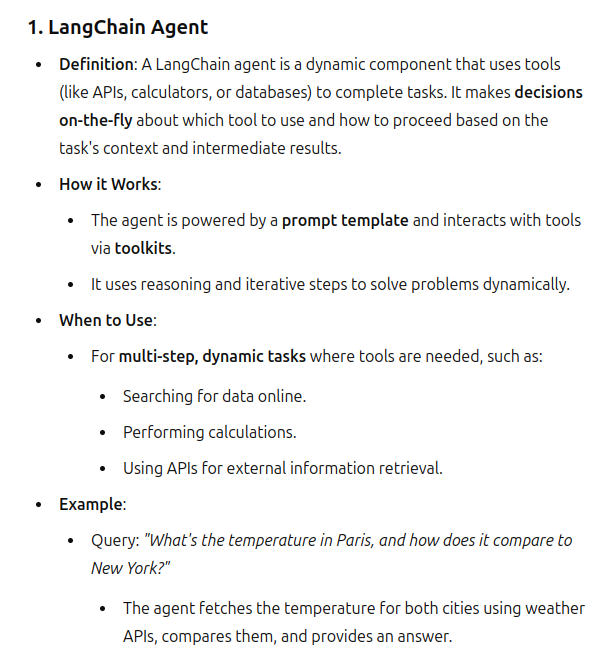

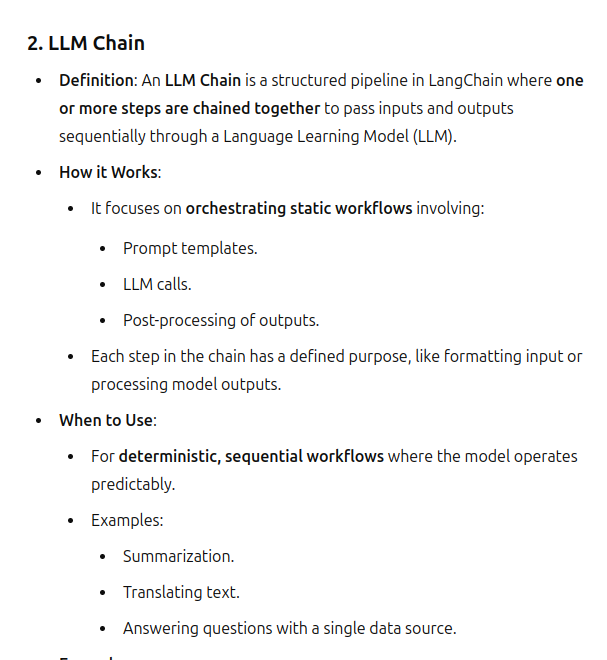

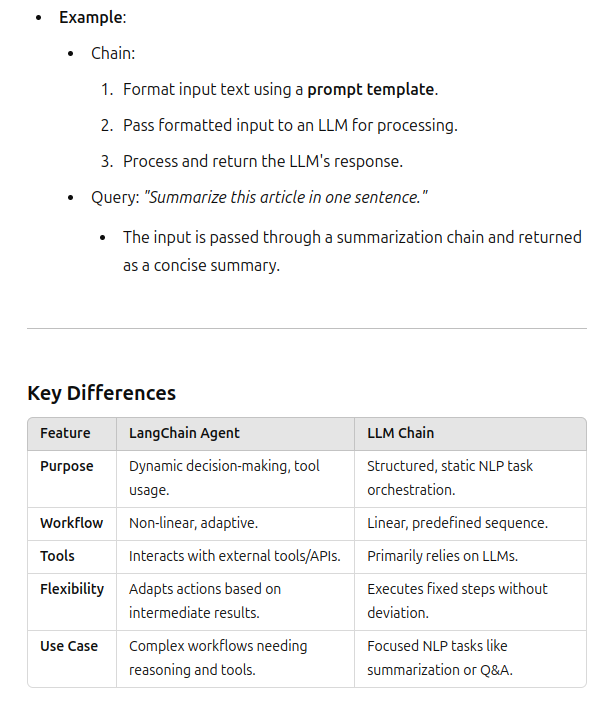

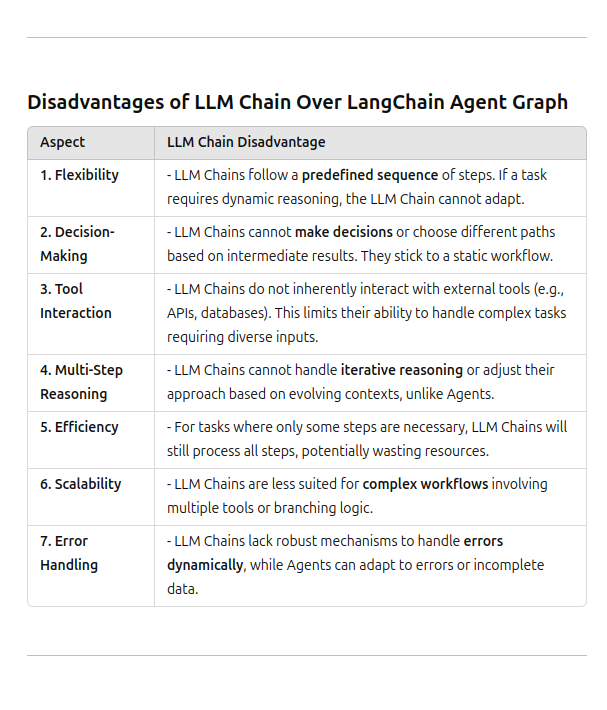

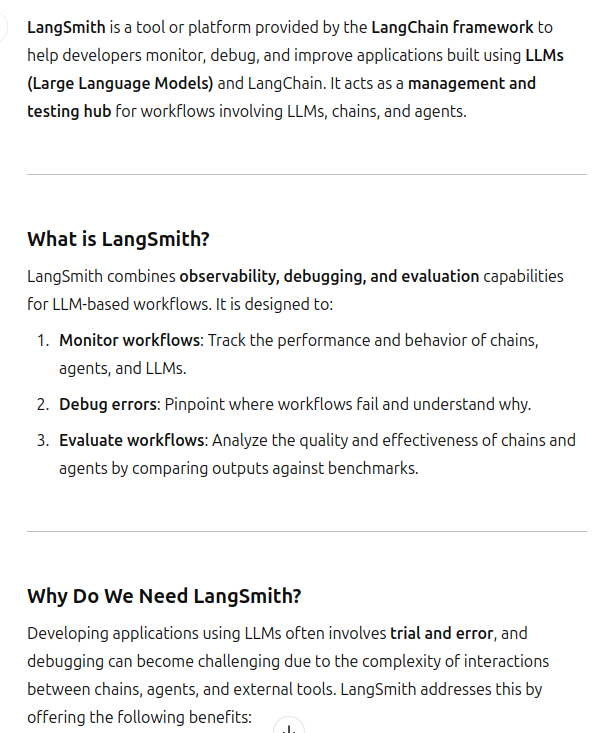

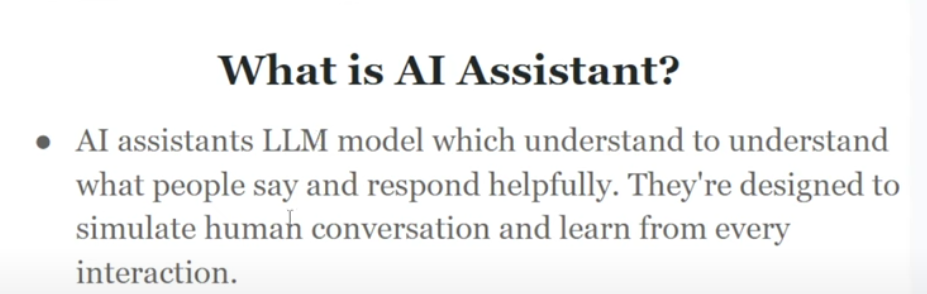

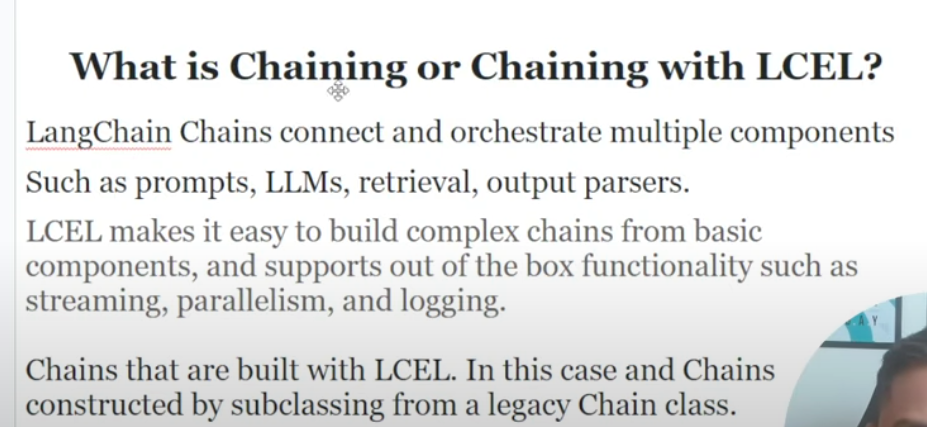

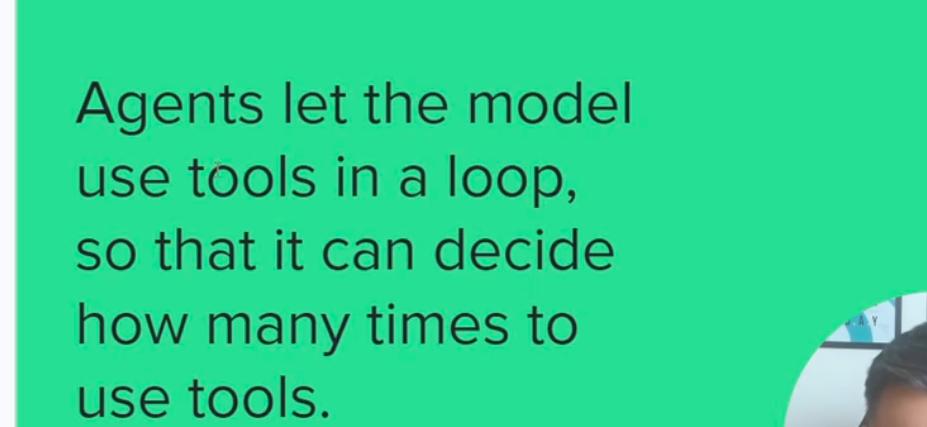

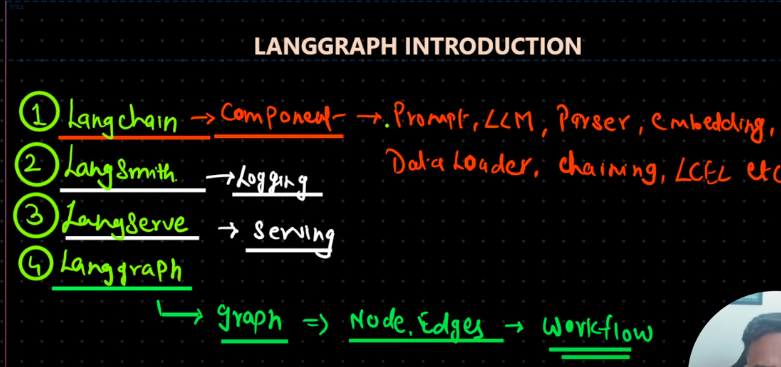

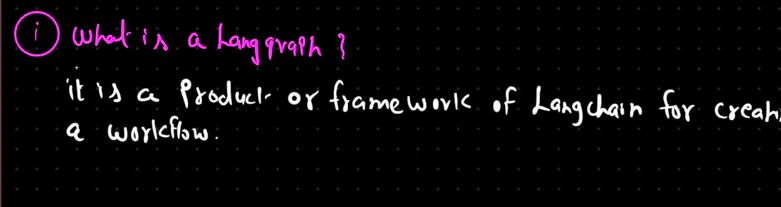

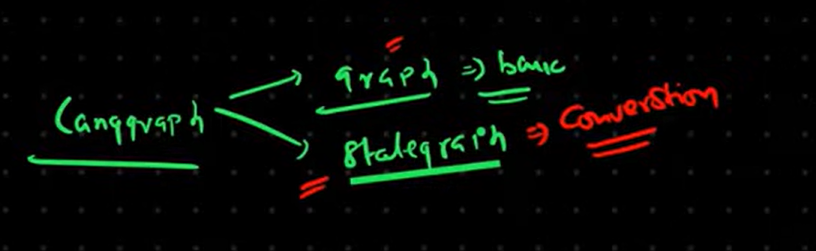

orchastraion--->pipeline or workflow or 


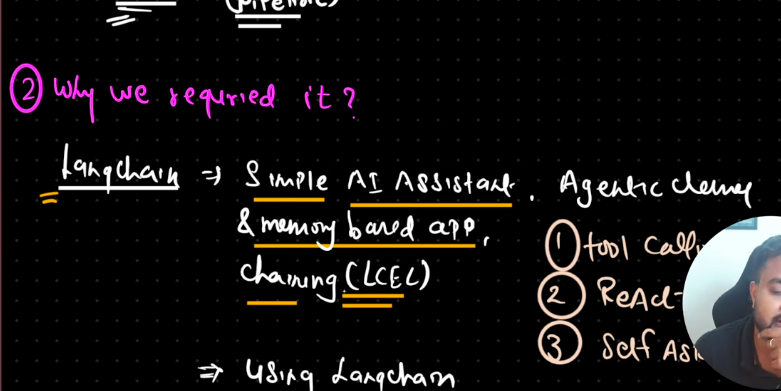

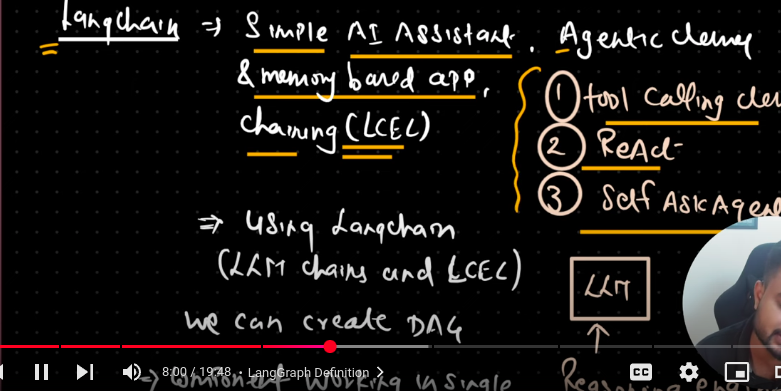 

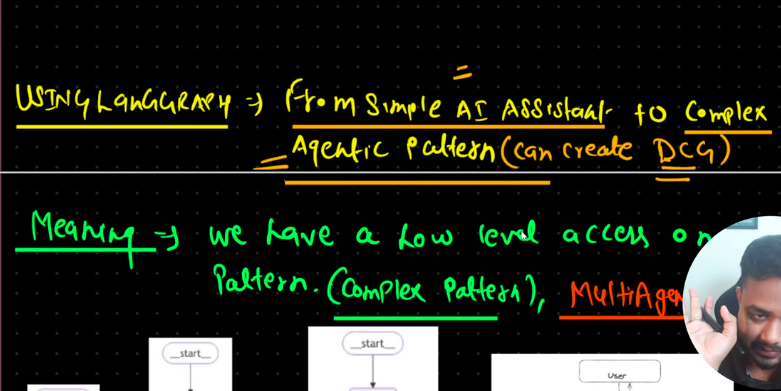

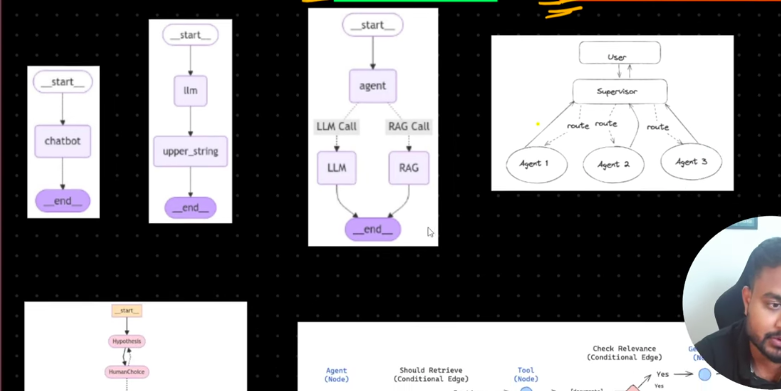

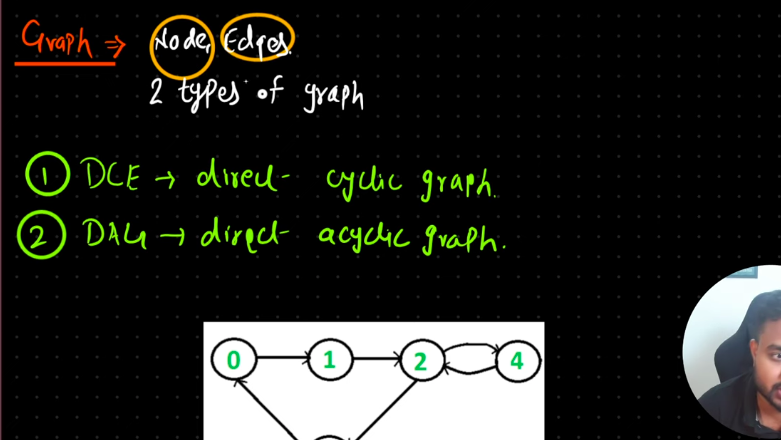

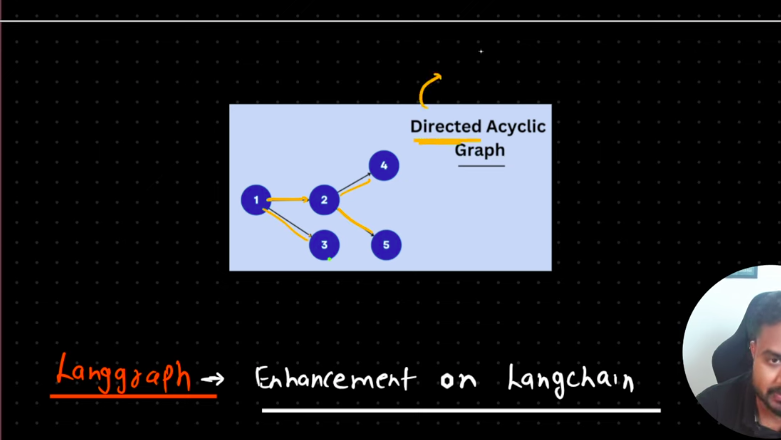

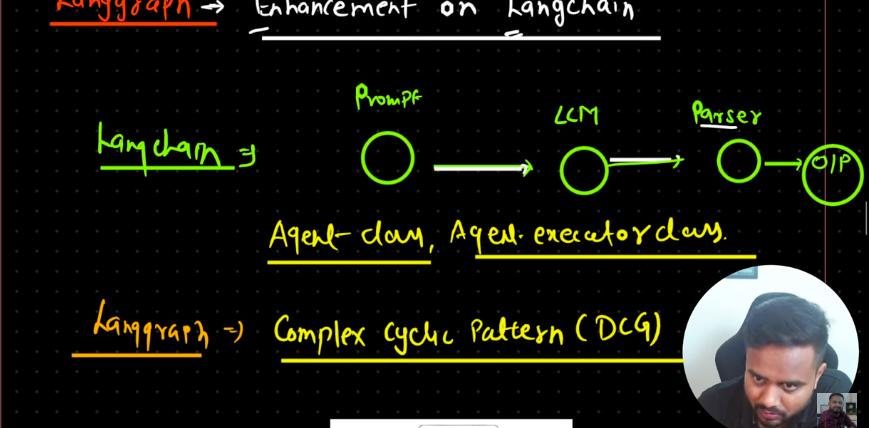

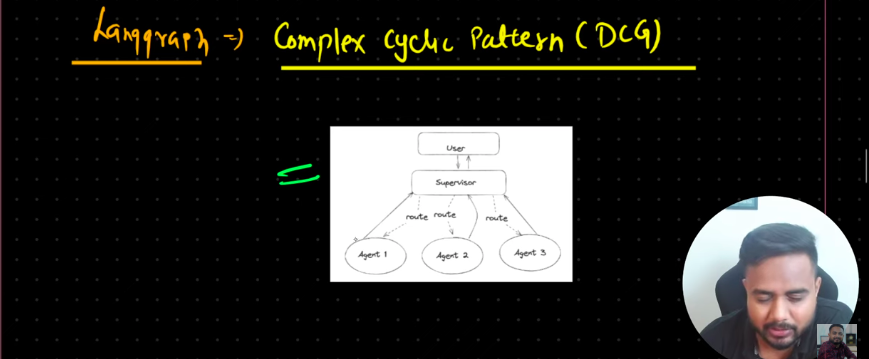

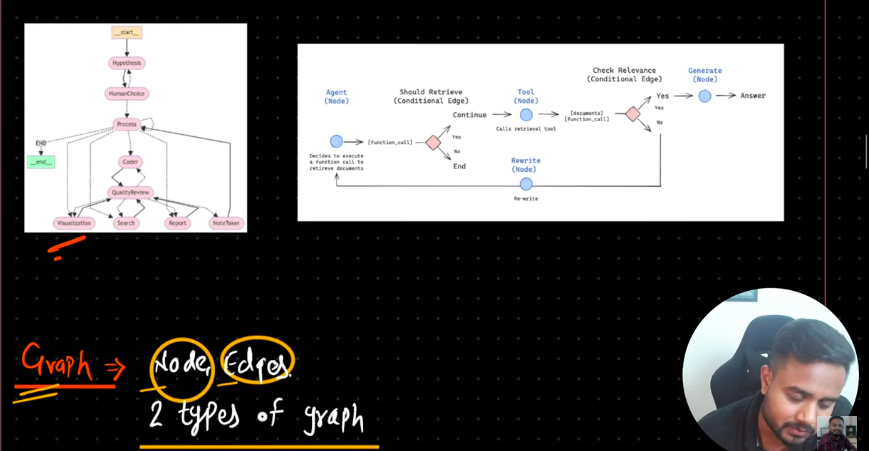

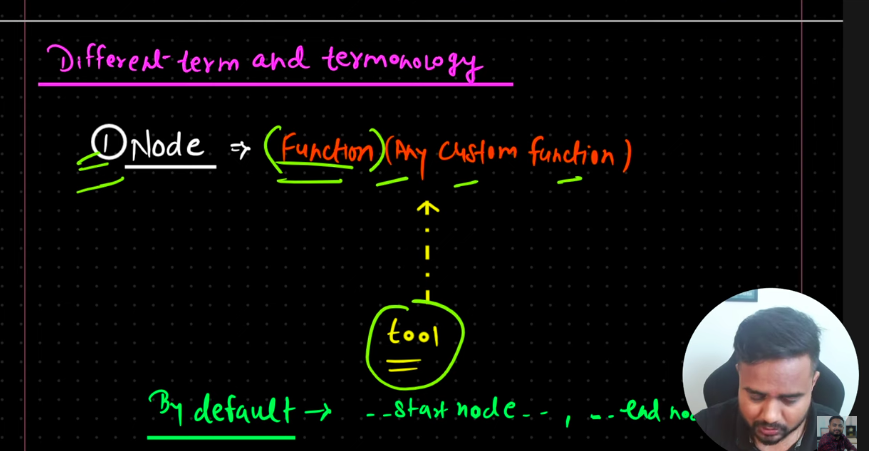

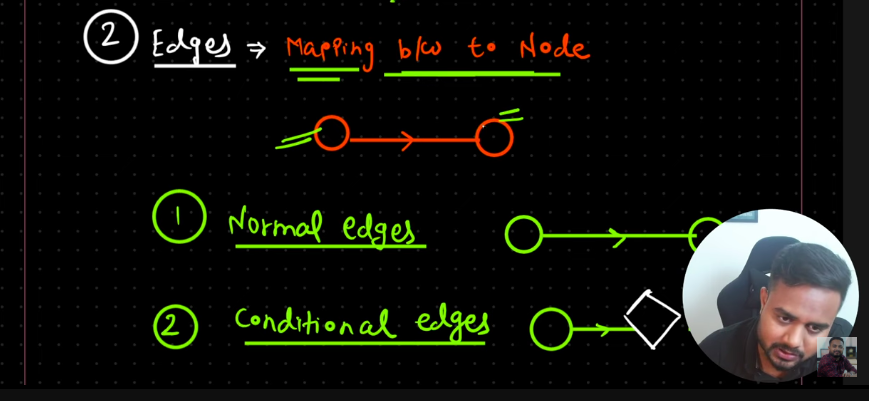

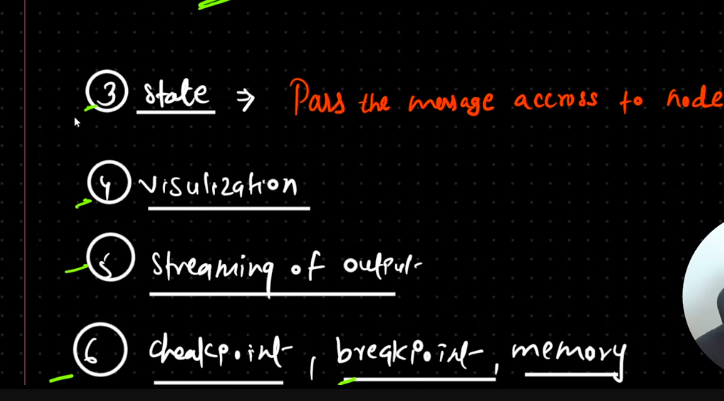

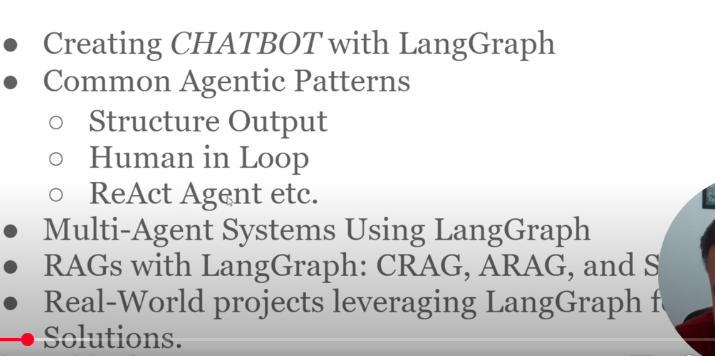

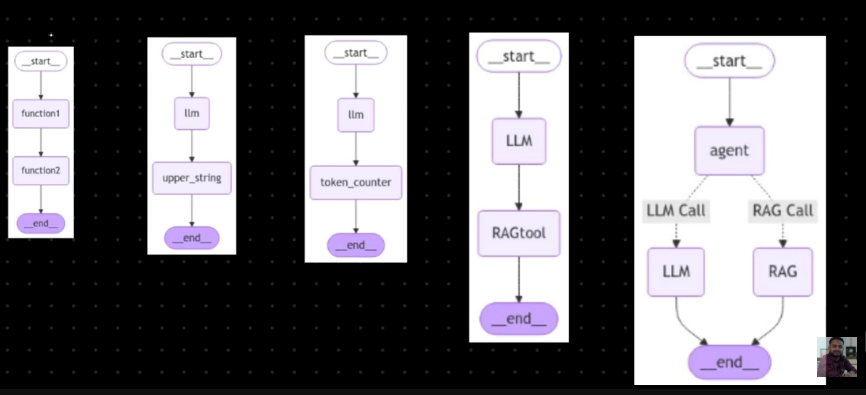

type of edge: Normal Edges
              Conditional Edge(in last imagee we have llm call and rag call that why it is conditional edge)      

# Simple WorkFlow of Graph

In [1]:
def function3(input3):
    return "Welcome from FUNCTION3"


def function1(input1):
    return "Welcome from FUNCTION1"


def function2( ):
    output = function3("this is 3rdfunction")
    return input2 +" "+ output

In [2]:
from langgraph.graph import Graph

In [3]:
# make workflow

workflow1 = Graph()

In [4]:
# decide the flow and start addiing the node and edges

workflow1.add_node("function1",function1)

In [5]:
workflow1.add_node('function2',function2)

In [6]:
workflow1.add_edge("function1","function2")

In [7]:
workflow1.set_entry_point("function1")

In [8]:
workflow1.set_finish_point("function2")

In [9]:
app1 = workflow1.compile()

In [10]:
from IPython.display import Image,display

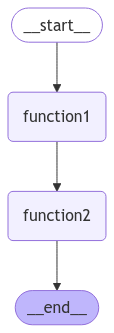

In [11]:
try:
    display(Image(app1.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)



In [12]:
# from langgraph.graph import Graph

# workflow1 = Graph()

# workflow1.add_node("function1",function1)

# workflow1.add_node("function2",function2)

# workflow1.add_edge("function1",'function2')

# workflow1.set_entry_point("function1")
# workflow1.set_finish_point("function2")

# # comple the workflow
# app1 = workflow1.compile()


# from IPython.display import Image,display

# try:
#     display(Image(app1.get_graph().draw_mermaid_png()))
# except Exception as e:
#     print(e)

In [13]:
app1.invoke("how are you")

'Welcome from FUNCTION1 Welcome from FUNCTION3'

In [16]:
for output in app1.stream("input"):
    for key,value in output.items():
        print(f"here is output -->{key}")
        print(value)

here is output -->function1
Welcome from FUNCTION1
here is output -->function2
Welcome from FUNCTION1 Welcome from FUNCTION3


# now create Work flow with llm

In [21]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

In [29]:
embedding_result  =embeddings.embed_query("how")
embedding_result

[0.026082918047904968,
 -0.028584398329257965,
 -0.04095986485481262,
 -0.027482731267809868,
 -0.01138364989310503,
 0.024114327505230904,
 0.03302132710814476,
 -0.004370789974927902,
 0.04773924499750137,
 0.041457630693912506,
 0.0032475364860147238,
 0.004747767001390457,
 -0.02373667247593403,
 -0.023113194853067398,
 0.0365261547267437,
 -0.021491017192602158,
 0.026775220409035683,
 0.05377795919775963,
 0.0021421932615339756,
 -0.027897566556930542,
 -0.004351571202278137,
 0.027446042746305466,
 -0.012603835202753544,
 -0.03602253645658493,
 0.011253274977207184,
 -0.030850781127810478,
 0.0006273331819102168,
 -0.05708525702357292,
 -0.01923285983502865,
 0.07201119512319565,
 -0.07271868735551834,
 0.03314565494656563,
 -0.045809306204319,
 -0.03016047552227974,
 -0.0038476709742099047,
 -0.0496494397521019,
 0.012677254155278206,
 0.01718073897063732,
 -0.005540788173675537,
 0.034537218511104584,
 -0.002409171313047409,
 -0.03400072082877159,
 -0.0054719592444598675,
 0.0

In [30]:
len(embedding_result)

768

In [42]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [43]:
llm = ChatGoogleGenerativeAI(model='gemini-1.0-pro')

In [44]:
llm.invoke("hi").content

'Hello! How can I help you today?'

In [45]:
def function1(input:str):
    llm = ChatGoogleGenerativeAI(model='gemini-1.0-pro')
    response = llm.invoke(input).content
    return response



def function2(input:str):
    response = input.upper()
    return response

In [51]:
# make the workflow

from langgraph.graph import Graph

workflow1 = Graph()
workflow1.add_node("llm",function1)
workflow1.add_node("upper_string",function2)

workflow1.add_edge('llm','upper_string')

workflow1.set_entry_point("llm")
workflow1.set_finish_point("upper_string")


app2  = workflow1.compile()


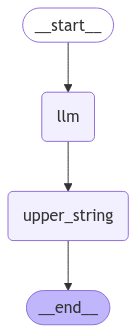

In [53]:
# draw the image

from IPython.display import Image,display

display(Image(app2.get_graph().draw_mermaid_png()))

In [54]:
app2.invoke("what is a name of the first indian PM")

'JAWAHARLAL NEHRU'

In [59]:
for output_app2 in app2.stream("what is name of PM"):
    for key,value in output_app2.items():
        print(key)
        print(value)

llm
Narendra Modi
upper_string
NARENDRA MODI


# Worflow 3 with Tokenizer

create our own token counter

In [60]:
def function3(input):
    token = input.split()
    token_number = len(token)
    token_number = f"total token number is {token_number}"
    return token_number

In [62]:

from langgraph.graph import Graph

workflow3 = Graph()
workflow3.add_node("llm",function1)
workflow3.add_node("token_counter",function3)

workflow3.add_edge('llm','token_counter')

workflow3.set_entry_point("llm")
workflow3.set_finish_point("token_counter")


app3  = workflow3.compile()

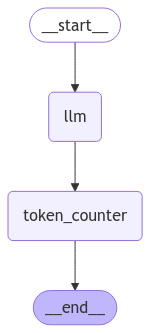

In [63]:
from IPython.display import Image, display

try:
    display(Image(app3.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [64]:
app3.invoke("what is a name of first indian prime minister?")

'total token number is 2'

In [65]:
app3.invoke("what is genai explain in detail?")

'total token number is 430'

# add webSearch tool in workflow

In [67]:
from langchain_community.tools import TavilySearchResults
tool = TavilySearchResults(max_results=2)
tools = [tool]

In [71]:
tool.run("campusX youtube channel link")

[{'url': 'https://www.youtube.com/c/CampusX-official',
  'content': "Hello, I'm Nitish Singh, the founder of CampusX, your online gateway into the world of data science! At CampusX, we believe that quality education is a universal right, not a privilege. We aim to"},
 {'url': 'https://vidiq.com/youtube-stats/channel/UCCWi3hpnq_Pe03nGxuS7isg/',
  'content': 'On our YouTube channel, we provide high quality free content covering everything related to data. Apart from this, we also provide paid mentorship programs for students where enrolled students get the benefit of personalized guidance through live and recorded video lectures, daily skill-building activities, hands-on projects, assignments, and'}]

# integrating the a RAG Pipeline

In [72]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-1.0-pro")

In [74]:
llm.invoke("how are you").content


'I am Gemini, a multimodal AI language model developed by Google. I don\'t have personal feelings or emotions, so I don\'t experience being "good" or "bad." I am designed to help people with a wide range of language-related tasks, such as answering questions, generating text, and translating languages.'

In [77]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough

from langchain_community.document_loaders import TextLoader,DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [92]:
loader = DirectoryLoader(path="/media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/LangGraph/TextData",
                         glob="./*.txt",
                         loader_cls=TextLoader
                         )

docs = loader.load()

text_spliter   = RecursiveCharacterTextSplitter(chunk_size=100,
                                       chunk_overlap=50)


document = text_spliter.split_documents(docs)
doc_string = [doc.page_content for doc in document]



In [102]:
db = Chroma.from_documents(documents=document,
                           embedding=embeddings,
                           persist_directory="../LangGraph/TextData")

In [107]:
db.similarity_search("Excepteur",k=2)

[Document(metadata={'source': '/media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/LangGraph/TextData/sample-text-file.txt'}, page_content='Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id'),
 Document(metadata={'source': '/media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/LangGraph/TextData/sample-text-file.txt'}, page_content='velit esse cillum dolore eu fugiat nulla pariatur.')]

In [117]:
retriever = db.as_retriever(kwargs=3)

In [118]:
retriever.invoke("how are you")

[Document(metadata={'source': '/media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/LangGraph/TextData/sample-text-file.txt'}, page_content='Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore'),
 Document(metadata={'source': '/media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/LangGraph/TextData/sample-text-file.txt'}, page_content='Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla'),
 Document(metadata={'source': '/media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/LangGraph/TextData/sample-text-file.txt'}, page_content='velit esse cillum dolore eu fugiat nulla pariatur.'),
 Document(metadata={'source': '/media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/LangGraph/TextData/sample-text-file.txt'}, page_content='elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam,')]

In [119]:
result = retriever.get_relevant_documents("3")

In [122]:
query = "what is meta llama3?"
docs = retriever.get_relevant_documents(query)
print(docs[0].metadata)
print(docs[0].page_content)

for doc in docs:
    print(doc)

{'source': '/media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/LangGraph/TextData/sample-text-file.txt'}
Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore
page_content='Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore' metadata={'source': '/media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/LangGraph/TextData/sample-text-file.txt'}
page_content='sunt in culpa qui officia deserunt mollit anim id est laborum.' metadata={'source': '/media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/LangGraph/TextData/sample-text-file.txt'}
page_content='velit esse cillum dolore eu fugiat nulla pariatur.' metadata={'source': '/media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/LangGraph/TextData/sample-text-file.txt'}
page_content='elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam,' metadata={'source': '/media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/LangGraph/TextData/